### Introduction

- In this notebook we are going to deal with a unsupervised learning (learning without teacher) problem called clustering.
- **Clustering** is a classical problem of Machine Learning which do not require any labels for any predictions. It is used to find patterns in data.

The collected data contains stocks of various companies collected for a period of time.

### Steps Involved:

1. Importing dataset
2. Exploratory Data Analysis (EDA) and Preprocessing
3. Feature Engineering
4. Model Building
5. Model Training
6. Optimization

1. **Importing dataset-** In this notebook we are going to use [pandas](https://pandas.pydata.org/) for loading our dataset. As our dataset is small, pandas works best in our case. For data sized upto Gigs we can use [datatable](https://github.com/h2oai/datatable).

2. **EDA and Preprocessing-** EDA, a crucial step that lets you get friendly with the data. It involves inspection of data through methods of dataframe object, visualization, statistics and hypothesis generation. EDA tells which preprocessing technique to use.
    
    Preprocessing can be defined as a method which makes our data suitable to fit on a machine learning model. Strategies that can be used in preprocessing of data is removing the NaN (missing) values, filling the NaN or impute those values using mean, median or mode, data type of the columns,dropping the unnecessary columns etc.
        
3. **Feature Engineering-** Feature Engineering involves feature selection or feature generation.
    - **Feature selection-** It involves selection of relevant features from the available set of features. The selection can be the entire set of features or a subset of it.
    
    - **Feature generation-** Construction or extraction of new features from the existing features. Useful when we have low set of features. The construction of feature is all mathematical and based on the domain expertise.

4. **Model Building-** In this step the suitable machine learning model is used. The data is divided into train and test set.

5. **Model Training-** Fitting the features into a machine learning model. The value of hyperparameters can use the default value or can be tuned in **Optimization** phase.

6. **Optimization-** In this step we tune the hyperparameters or the learned model. The hyperparameters can be tuned by using GridSearch. The learned model can be tuned by using cross-validation technique.

### What is K-Means?
K-Means is a technique of unsupervised learning to find clusters from a given set of data points. It finds the cluster by calculating the centroid between the data points.

### Frameworks used:
- pandas
- numpy
- matplotlib
- scikit-learn

### 1. Importing dataset

#### Looking for the dataset directory

In [1]:
from glob import glob
files = glob('*')

files

['Clustering.ipynb', 'data']

The dataset is residing in **data** directory.

#### Getting file name

In [2]:
dataset = glob('data/*')

dataset

['data/Telco-Customer-Churn.csv']

#### Loading data into DataFrame using pandas.

In [3]:
import pandas as pd

telco_user_churn = pd.read_csv('data/Telco-Customer-Churn.csv')

#### Inspecting first 5 rows of dataset

In [4]:
telco_user_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Number of rows and columns in our dataset

In [5]:
telco_user_churn.shape

(7043, 21)

**Rows= 7043, Columns= 21**

### 2. Exploratory Data Analysis (EDA) and Preprocessing

**Inspecting the columns datatype and how many of them have null values.**

In [6]:
telco_user_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### Observations:

- None of the columns have null values.
- The **TotalCharges** column have a wrong datatype.

In [7]:
telco_user_churn.loc[telco_user_churn['TotalCharges'] == ' ', 'TotalCharges'] = '0'

telco_user_churn['TotalCharges'] = telco_user_churn.TotalCharges.astype('float')

#### Number of unique values in each column

In [8]:
for col in telco_user_churn.columns:
    print(col, telco_user_churn[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [9]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')

#### Distribution of Male and Female with their churn rate

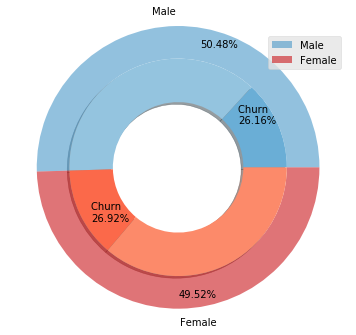

In [10]:
# Customizing plot size
plt.rcParams['figure.figsize'] = [6, 5]

gender_count = telco_user_churn.gender.value_counts()
churn_rate = [930, 2625, 939, 2549]

# Colors
male, female = [plt.cm.Blues, plt.cm.Reds]

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(gender_count.values, radius=1.3, labels=gender_count.index,
                  colors=[male(0.6), female(0.75)])
plt.setp(mypie, width=0.3, alpha=0.6)

mypie2, _ = ax.pie(churn_rate, radius=1.3-0.3,  labeldistance=0.7,
                   colors=[male(0.5), male(0.4), female(0.5), female(0.4)], shadow=True)
plt.setp(mypie2, width=0.4)

# Male distribution
plt.annotate('{:.2f}%'.format(gender_count.values[0] / gender_count.values.sum() * 100), 
             xy=(.2, 1.1))

# Male churn rate
plt.annotate('Churn \n{:.2f}%'.format(churn_rate[0] / gender_count.values[0] * 100), 
             xy=(.55, 0.4))

# Female distribution
plt.annotate('{:.2f}%'.format(gender_count.values[1] / gender_count.values.sum() * 100), 
             xy=(0, -1.2))

# Female churn rate
plt.annotate('Churn \n{:.2f}%'.format(churn_rate[2] / gender_count.values[1] * 100), 
             xy=(-0.8, -0.5))

plt.legend(loc='upper right')
plt.show()

**Observation:** Though males are high in number but females have more churn rate.

### How many users have phone service?

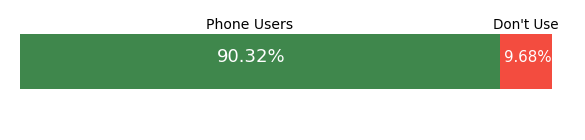

In [11]:
# Customizing plot size
plt.rcParams['figure.figsize'] = [10, 2]

user_phone_service = telco_user_churn.PhoneService.value_counts(normalize=True)

users = pd.DataFrame({'x': [user_phone_service.values[0]], 'y': [user_phone_service.values[1]]})

users.plot(kind='barh', stacked=True, legend=False, 
          color=['#005f11', '#ef1100'], alpha=0.75)
plt.axis('off')
plt.annotate('Phone Users', xy=(0.35, 0.3), fontsize=14)
plt.annotate("Don't Use", xy=(0.89, 0.3), fontsize=13.5)
plt.annotate("{:.2f}%".format(users['x'][0]*100), xy=(0.37, 0),
             color='#ffffff', fontsize=18)
plt.annotate("{:.2f}%".format(users['y'][0]*100), xy=(0.91, 0),
             color='#ffffff', fontsize=15)
plt.show()

### Internet Service distribution and their churn rate

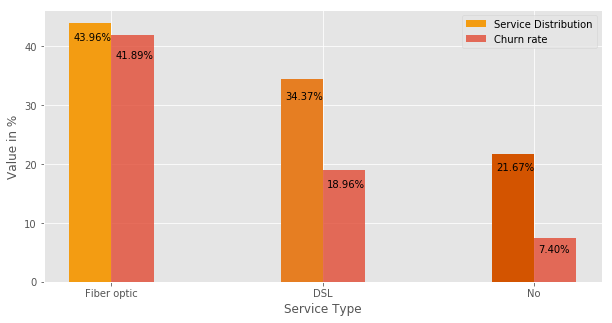

In [12]:
import numpy as np

# Customizing plot size
plt.rcParams['figure.figsize'] = [10, 5]

internet_service = telco_user_churn.InternetService.value_counts()
churn_internet_service = telco_user_churn.loc[telco_user_churn.Churn == 'Yes', 
                                              'InternetService'].value_counts()
distribution = []
for val in internet_service.values:
    distribution.append((val / np.sum(internet_service.values))*100)

churn_rate = (churn_internet_service.values / internet_service.values) * 100
             
plt.bar(np.array([1, 2, 3]), distribution, width=0.20,
        color=['#F39C12', '#E67E22', '#D35400'], label="Service Distribution")
plt.bar(np.array([1, 2, 3]) + 0.2, churn_rate, width=0.20, 
        label="Churn rate", alpha=0.8)

plt.xlabel('Service Type')
plt.ylabel('Value in %')
plt.xticks(np.array([1, 2, 3])+0.1, internet_service.index)

# Service Distribution
plt.annotate("{:.2f}%".format(distribution[0]), (0.92, 41))
plt.annotate("{:.2f}%".format(distribution[1]), (1.92, 31))
plt.annotate("{:.2f}%".format(distribution[2]), (2.92, 19))

# Churn rate
plt.annotate("{:.2f}%".format(churn_rate[0]), (1.12, 38))
plt.annotate("{:.2f}%".format(churn_rate[1]), (2.12, 16))
plt.annotate("{:.2f}%".format(churn_rate[2]), (3.12, 5))

plt.legend()
plt.show()

### Phone Users that have internet service and their churn rate

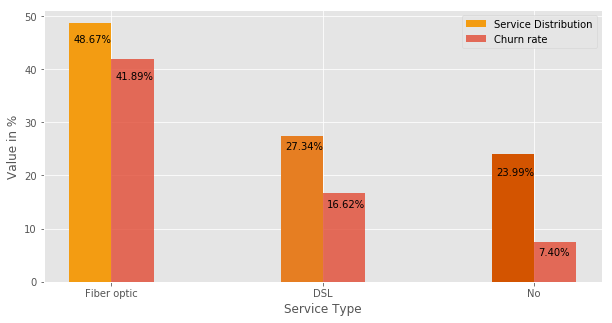

In [13]:
# Customizing plot size
plt.rcParams['figure.figsize'] = [10, 5]

have_internet = telco_user_churn.loc[telco_user_churn.PhoneService == 'Yes', 
                                     'InternetService'].value_counts()

churn_internet_service = telco_user_churn.loc[(telco_user_churn.PhoneService == 'Yes') & 
                                  (telco_user_churn.Churn == 'Yes'), 'InternetService'].value_counts()

distribution = []
for val in have_internet.values:
    distribution.append((val / have_internet.values.sum())*100)

churn_rate = (churn_internet_service.values / have_internet.values) * 100
             
plt.bar(np.array([1, 2, 3]), distribution, width=0.20,
        color=['#F39C12', '#E67E22', '#D35400'], label="Service Distribution")
plt.bar(np.array([1, 2, 3]) + 0.2, churn_rate, width=0.20, 
        label="Churn rate", alpha=0.8)

plt.xlabel('Service Type')
plt.ylabel('Value in %')
plt.xticks(np.array([1, 2, 3])+0.1, internet_service.index)

# Service Distribution
plt.annotate("{:.2f}%".format(distribution[0]), (0.92, 45))
plt.annotate("{:.2f}%".format(distribution[1]), (1.92, 25))
plt.annotate("{:.2f}%".format(distribution[2]), (2.92, 20))

# Churn rate
plt.annotate("{:.2f}%".format(churn_rate[0]), (1.12, 38))
plt.annotate("{:.2f}%".format(churn_rate[1]), (2.12, 14))
plt.annotate("{:.2f}%".format(churn_rate[2]), (3.12, 5))

plt.legend()
plt.show()

#### Fiber optics users have more churn rate

### What are the causes of such a huge churn rate for fiber optics users?

#### Do tech support affects the churn rate?

In [14]:
from IPython.display import display, Markdown

tech_support = telco_user_churn.loc[telco_user_churn.InternetService == 'Fiber optic',
                                    'TechSupport'].value_counts()
yes = telco_user_churn.loc[(telco_user_churn.InternetService == 'Fiber optic') &
                           (telco_user_churn.TechSupport == 'Yes'), 'Churn'].value_counts()
no = telco_user_churn.loc[(telco_user_churn.InternetService == 'Fiber optic') &
                           (telco_user_churn.TechSupport == 'No'), 'Churn'].value_counts()

# display(Markdown('### Facts:'))
# display(Markdown('- Out of <strong style="font-size:18px;">{}</strong> fiber optic users, '
#                  'only  <strong style="font-size:17px;color:red;">{:.2f}%</strong>  opted Tech Support.'.
#                  format(tech_support.values.sum(), tech_support.values[1] / tech_support.values.sum() * 100)))

# display(Markdown('- The users who opted tech support have churn rate of '
#                  '<strong style="font-size:18px;color:red;">{:.2f}%</strong>'.
#                  format(yes[1] / yes.values.sum() * 100)))

# display(Markdown("- On the other hand users who didn't adopt tech support have a churn rate of "
#                 '<strong style="font-size:18px;color:red;">{:.2f}%</strong>'.format(no[1] / no.values.sum() * 100)))

### Facts:

- Out of 3096 fiber optic users, only 27.97% opted Tech Support.
- The users who opted tech support have churn rate of 22.63%
- On the other hand users who didn't adopt tech support have a churn rate of 49.37%

### Do monthly charges affect churn rate?

#### a. In which range the monthly charges are maximum?

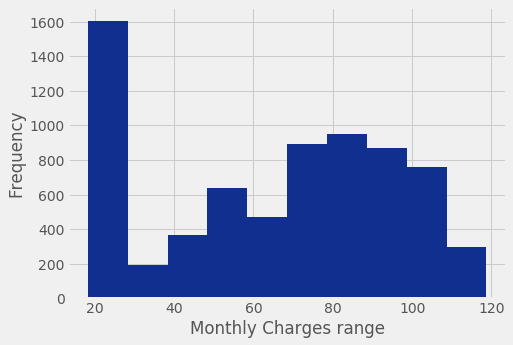

In [15]:
# Customizing plot size
plt.rcParams['figure.figsize'] = [7, 5]
plt.style.use('fivethirtyeight')

plt.hist(telco_user_churn.MonthlyCharges, color='#112f8f')
plt.xlabel('Monthly Charges range')
plt.ylabel('Frequency')
plt.show()

#### Values are more in range of 20-40

#### b. Churn rate of these ranges

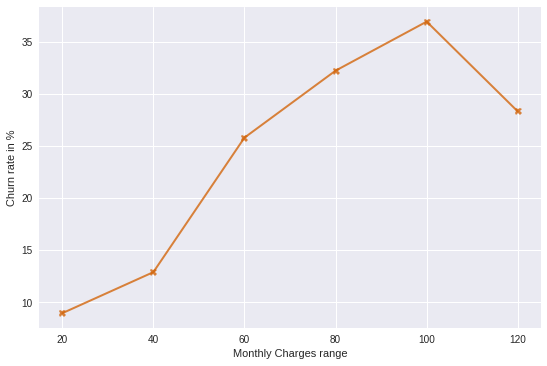

In [16]:
# Customizing plot size
plt.rcParams['figure.figsize'] = [5, 5]
plt.style.use('seaborn')

x_ticks = []
values = []

for charge in range(0, 120, 20):
    churn = telco_user_churn.loc[(telco_user_churn.MonthlyCharges >= charge) &
                         (telco_user_churn.MonthlyCharges < charge+20), 
                         'Churn'].value_counts()
    x_ticks.append(str(charge + 20))
    values.append(churn[1] / churn.values.sum() * 100)

plt.plot(x_ticks, values, color='#d3660c', marker='X', alpha=0.8, linewidth=2)
plt.xlabel('Monthly Charges range')
plt.ylabel('Churn rate in %')
plt.show()

#### Churn rate is maximum in range of 80-100.

### 3. Feature Engineering

#### Analyzing the variance of features

In [17]:
telco_user_churn.var()

SeniorCitizen     1.358745e-01
tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.138357e+06
dtype: float64

In [18]:
# Features
X = telco_user_churn.loc[telco_user_churn.Churn == 'Yes', 
                         ['MonthlyCharges', 'tenure']].values

#### Scaling the monthly charges

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

### 4. Model Building

In [20]:
from sklearn.cluster import KMeans

#### Finding the best cluster value

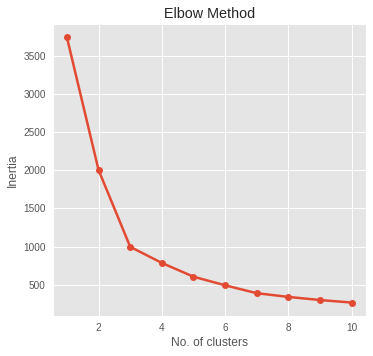

In [21]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.style.use('ggplot')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linewidth=2.5)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

#### Best cluster value is 3

### 5. Model Training

#### Fitting the model at `n_clusters = 3`

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
label = kmeans.predict(X)

### 6. Model Evaluation

#### Analyzing the formed clusters

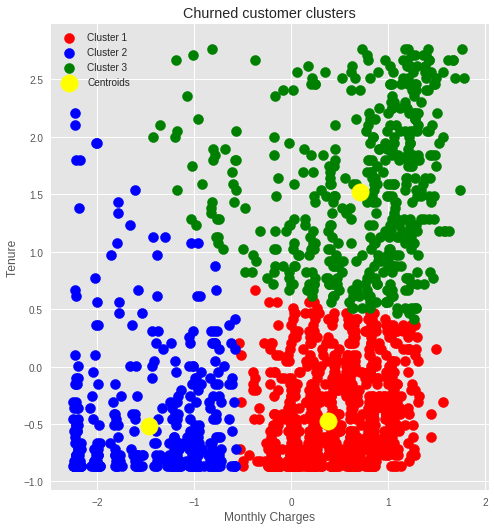

In [23]:
plt.rcParams['figure.figsize'] = [7, 8]
plt.style.use('ggplot')

plt.scatter(X[label == 0, 0], X[label == 0, 1], s = 100, 
            c = 'red', label = 'Cluster 1')
plt.scatter(X[label == 1, 0], X[label == 1, 1], s = 100,
            c = 'blue', label = 'Cluster 2')
plt.scatter(X[label == 2, 0], X[label == 2, 1], s = 100,
            c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, 
            c = 'yellow', label = 'Centroids')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.title('Churned customer clusters')
plt.legend()
plt.show()

### Observations:
- **Cluster 1:** Customers thought that high paid services are better. So they opted the services for a long tenure. In the end they are not satisfied.

- **Cluster 2:** Mid-range paid service have lower tenure than the other charges.

- **Cluster 3:** Customers are looking for temporary service and that's why the tenure is lower than 10.